In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pune = pd.read_csv('D:/TaxQueryAI/datasets/transformed_data/Property-Tax-Pune.csv')
pune.head()

,City_Name,Zone_Name,Ward_Name,Ward_No,Tax_Collection_Cr_2013_14_Residential,Tax_Collection_Cr_2014_15_Residential,Tax_Collection_Cr_2015_16_Residential,Tax_Collection_Cr_2016_17_Residential,Tax_Collection_Cr_2017_18_Residential,Tax_Demand_Cr_2013_14_Residential,...,Tax_Collection_Cr_2013_14_Commercial,Tax_Collection_Cr_2014_15_Commercial,Tax_Collection_Cr_2015_16_Commercial,Tax_Collection_Cr_2016_17_Commercial,Tax_Collection_Cr_2017_18_Commercial,Tax_Demand_Cr_2013_14_Commercial,Tax_Demand_Cr_2014_15_Commercial,Tax_Demand_Cr_2015_16_Commercial,Tax_Demand_Cr_2016_17_Commercial,Tax_Demand_Cr_2017_18_Commercial
0,Pune,1,Aundh,8,40.60,42.39,57.78,55.35,55.67,42.07,...,19.88,25.55,34.57,44.96,32.20,27.84,35.26,38.42,46.72,42.55
1,Pune,1,Baner,17,7.39,9.25,14.37,17.70,17.79,7.40,...,5.15,10.34,11.21,17.16,18.79,6.23,10.36,10.30,23.36,21.39
2,Pune,3,Bhavani Peth,2,6.03,6.59,10.24,7.48,6.71,6.02,...,6.43,8.59,8.94,15.48,9.08,6.97,16.49,8.80,17.27,11.23
3,Pune,4,Bibwe Wadi,13,29.22,28.85,46.92,40.81,42.66,29.56,...,11.63,13.17,22.69,28.66,19.50,13.29,16.10,27.23,29.80,26.21
4,Pune,2,Chandan Nagar,21,5.26,4.90,7.52,5.77,5.65,4.26,...,2.81,2.51,3.08,2.69,4.68,2.27,2.35,2.64,2.70,3.16


In [3]:
tax_sums = pune[[
    'Tax_Demand_Cr_2013_14_Residential',
    'Tax_Demand_Cr_2014_15_Residential',
    'Tax_Demand_Cr_2015_16_Residential',
    'Tax_Demand_Cr_2016_17_Residential',
    'Tax_Demand_Cr_2017_18_Residential'
]].sum(axis=0)

In [4]:
pune_sum = tax_sums.reset_index()
pune_sum.columns = ['Year', 'Tax Collected (Cr)']
pune_sum

,Year,Tax Collected (Cr)
0,Tax_Demand_Cr_2013_14_Residential,373.58
1,Tax_Demand_Cr_2014_15_Residential,382.03
2,Tax_Demand_Cr_2015_16_Residential,445.15
3,Tax_Demand_Cr_2016_17_Residential,516.10
4,Tax_Demand_Cr_2017_18_Residential,546.97


In [5]:
X = np.array([2014, 2015, 2016, 2017, 2018]).reshape(-1, 1)
y = pune_sum['Tax Collected (Cr)'].values

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
y_pred = model.predict(X)
y_pred

array([356.596, 404.681, 452.766, 500.851, 548.936])

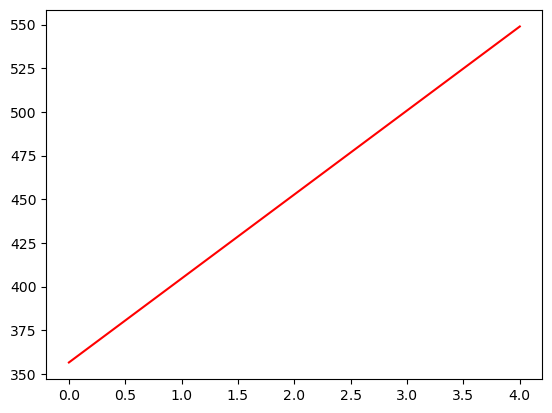

In [8]:
plt.plot(y_pred, color="red")
plt.show()

In [9]:
predicted_tax_2019 = model.predict([[2019]])

In [10]:
model.score(X, y)

0.9547467622976644

In [11]:
print(f"Predicted tax demand for residential in 2019: {predicted_tax_2019[0]} Cr")

Predicted tax demand for residential in 2019: 597.0210000000079 Cr
